In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fo

In [4]:
df=pd.read_csv("Delhi-Metro-Network.csv")

In [8]:
df.head(5)

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [9]:
#preprocessing data

In [13]:
missin_val=df.isnull().sum()

In [14]:
missin_val

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [15]:
df.describe()

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [18]:
df['Opening Date'] = pd.to_datetime(df['Opening Date'])

In [24]:
df['Opening Date'].sample(5)

199   2018-03-14
32    2010-03-10
74    2019-09-03
276   2017-12-25
46    2018-03-14
Name: Opening Date, dtype: datetime64[ns]

In [28]:
df['Line'].value_counts()

Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: Line, dtype: int64

In [32]:
#Defining color schemas to represent my 13 metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'magenta',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'teal',
    'Orange line': 'peach',
    'Rapid Metro': 'violet',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lavender',
    'Gray line': 'cyan'
}

In [61]:
Dmap = fo.Map(location=[28, 77.1025], zoom_start=11)

In [62]:
for index, row in df.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')
    fo.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=fo.Icon(color=color)
    ).add_to(Dmap)

<ipython-input-62-e16be9d23289>:8: UserWarning: color argument of Icon should be one of: {'lightgray', 'white', 'orange', 'blue', 'lightblue', 'purple', 'pink', 'red', 'darkblue', 'darkpurple', 'green', 'lightgreen', 'lightred', 'gray', 'black', 'cadetblue', 'beige', 'darkgreen', 'darkred'}.
  icon=fo.Icon(color=color)


In [63]:
Dmap

In [76]:
# Temporal Analysis of growth of stations over years

In [81]:
import matplotlib.colors as colors

In [77]:
df['Opening Year'] = df['Opening Date'].dt.year
stations = df['Opening Year'].value_counts().sort_index()

stationsdf=stations.reset_index()
stationsdf.columns = ['Year', 'Number of Stations']


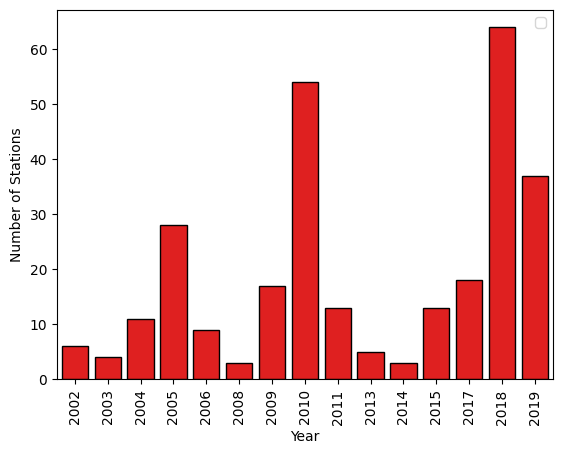

In [83]:
sns.barplot(data=stationsdf,x='Year',y='Number of Stations',edgecolor='black',color='red')
plt.xticks(rotation=90)
plt.gca().margins(x=0.01)
plt.legend()

In [84]:
st = df['Line'].value_counts()

total_dist_per_line = df.groupby('Line')['Distance from Start (km)'].max()

avg_dist_per_line = total_dist_per_line / (st - 1)

line_analysis = pd.DataFrame({
    'Line': st.index,
    'Number of Stations': st.values,
    'Average Distance Between Stations (km)': avg_dist_per_line
})

# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
print(line_analysis)

                 Line  Number of Stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6           Aqua line                  21   
7          Green line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   6   
11          Gray line                   3   
12  Green line branch                   3   

    Average Distance Between Stations (km)  
0                                 1.355000  
1                                 1.097917  
2                                 1.157143  
3                                 1.950000  
4                                 1.240000  
5                                 1.050000  
6                                 1.379167  
7        

In [85]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [93]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of Stations Per Metro Line',
                                                    'Average Distance Between Stations Per Metro Line'),
                    horizontal_spacing=0.2)

fig.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Number of Stations'],
           orientation='h', name='Number of Stations', marker_color='crimson'),
    row=1, col=1
)

# plot for Average Distance Between Stations
fig.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Average Distance Between Stations (km)'],
           orientation='h', name='Average Distance (km)', marker_color='navy'),
    row=1, col=2
)

# update xaxis properties
fig.update_xaxes(title_text="Number of Stations", row=1, col=1)
fig.update_xaxes(title_text="Average Distance Between Stations (km)", row=1, col=2)

# update yaxis properties
fig.update_yaxes(title_text="Metro Line", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=2)

# update layout
fig.update_layout(height=600, width=1200, title_text="Metro Line Analysis", template="plotly_white")

fig.show()

In [92]:
layout_counts = df['Station Layout'].value_counts()

# creating the bar plot using Plotly
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x': 'Station Layout', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='rainbow')

# updating layout for better presentation
fig.update_layout(xaxis_title="Station Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=True,
                  template="plotly_white")

fig.show()